# Dokumentation
### Gruppe Streckung und Stauchung
### Seminar Visuelle Wahrnehmung beim Menschen und Bildqualität

# Motivation

Die Idee hatten wir, weil ein Mitglied unserer Gruppe ein stark verzerrtes Foto im Studierendenausweis hatte und wir uns fragten, wie sich Verzerrung auf die menschliche Wahrnehmung auswirkt. Etwas Brainstorming kombiniert mit der Niedlichkeit von Hunden und Katzen brachte uns schließlich dazu, untersuchen zu wollen, ob Menschen Bildverzerrung bei anderen Menschen schneller erkennen als bei Hunden und Katzen. Damit waren wir also bei zwei Fragestellungen und Hypothesen:

"Können Menschen Stauchungen deutlicher erkennen als Streckungen?"
und unsere Hypothese:
"Wenn Menschen empfindlicher für Stauchungen als für Streckungen in Bildern von Gesichtern sind, dann erkennen sie die gestauchten Bilder deutlicher."

sowie
"Sind Menschen empfindlicher für Bildverzerrungen in menschlichen Gesichtern als in Gesichtern anderer Spezies wie beispielsweise Hunde oder Katzen?"
und die dazugehörige Hypothese:
"Wenn Menschen empfindlicher für Verzerrungen in Bildern von menschlichen Gesichtern sind, dann sollten sie bei gleichem Verzerrungsgrad, die Verzerrung eher in menschlichen als tierischen Gesichtern erkennen."

# Sammeln und Aufbereiten der Bilder

Wir entschieden uns, Bilder von eigenen Haustieren sowie denen aus Freundes- und Familienkreis zu sammeln und bei den Menschen auf Bilder von Prominenten zurückzugreifen. Nach dem Sammeln der Bilder standen wir allerdings vor dem Problem, das ein einfaches Verzerren der Bilder leicht an der unterschiedlichen Länge der Bilder zu erkennen wäre. Deshalb haben wir alle Gesichter der Versuchsobjekte per Hand einzeln in einem Bildbearbeitungsprogramm ausgeschnitten, bevor wir die so vorbereiteten Bilder verzerrten.

# Skript zur Verzerrung der Input Bilder

Unser Skript zur Verzerrung der Bilder hat sich im Laufe des Projektes verändert. In der ersten Fassung war der Verzerrungsgrad für jedes einzelne Bild komplett zufällig, wodurch wir nicht sicherstellen konnten, dass gestauchte und gestreckte Bilder, beziehungsweise Bilder von Menschen und Haustieren gleich stark verzerrt waren. Das hätte den Vergleich verfälscht, also musste ein neues Skript her. 

In dieser Version werden die Verzerrungsstufen alle der Reihe nach auf die Bilder angewendet, um eine gleichmäßige Verteilung zu gewährleisten.

In [69]:
import cv2
import glob
import copy
import os
import csv
import random

from IPython.display import Image

### global variables
path_parent_folder = os.path.dirname(os.getcwd())
print(path_parent_folder)
path_input_files = path_parent_folder +"/input/"
path_input_pets = path_input_files + "pets/"
path_input_humans = path_input_files + "humans/"
path_output_files = path_parent_folder + "/output/"
file_type = ["/*.jpg", "/*.csv", "/*.png"]

/home/jan/Documents/VW


In [70]:
### fetch all images in folder and save in list
data_path_humans = glob.glob(path_input_humans + file_type[0])
human_image_list = []
for img in data_path_humans:
    images = cv2.imread(img)
    human_image_list.append(images)

data_path_pets = glob.glob(path_input_pets + file_type[0])
pet_image_list = []
for img in data_path_pets:
    images = cv2.imread(img)
    pet_image_list.append(images)

In [71]:
### copy list of images to process further
human_streched_image_list = copy.deepcopy(human_image_list)
human_compressed_image_list = copy.deepcopy(human_image_list)
pet_streched_image_list = copy.deepcopy(pet_image_list)
pet_compressed_image_list = copy.deepcopy(pet_image_list)

In [72]:
def transformImageVertically(ListOfImages, number_from, number_to, number_step, img_type):
    count_number = 1
    scale_percent = number_from
    
    for item in ListOfImages:
        # needed to call fkt. without distortion
        if(number_step != 0):
            # added to ensure all distortion rates are applied
            if(scale_percent < number_to and (count_number != 1) and (count_number % 2 == 1)):
                scale_percent += number_step
        else:
            scale_percent = 100
            
        # keep default img width
        original_width = item.shape[1]
        
        # manipulate height by % in given range
        new_height = int(item.shape[0] * scale_percent / 100)
        
        # saves height and width
        dim_size = (original_width, new_height)
        
        # apply distortion
        vScaled_img = cv2.resize(item, dim_size, interpolation=cv2.INTER_AREA)
        
        # resizes image to 10cm height
        if(scale_percent == 150):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /1.5), fy=(1 /1.5))
        elif(scale_percent == 140):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /1.4), fy=(1 /1.4))
        elif(scale_percent == 130):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /1.3), fy=(1 /1.3))
        elif(scale_percent == 120):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /1.2), fy=(1 /1.2))
        elif(scale_percent == 110):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /1.1), fy=(1 /1.1))
        elif(scale_percent == 50):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /0.5), fy=(1 /0.5))
        elif(scale_percent == 60):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /0.6), fy=(1 /0.6))
        elif(scale_percent == 70):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /0.7), fy=(1 /0.7))
        elif(scale_percent == 80):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /0.8), fy=(1 /0.8))
        elif(scale_percent == 90):
            vScaled_img = cv2.resize(vScaled_img, (0, 0), fx=(1 /0.9), fy=(1 /0.9))
       
        # save files in right format
        cv2.imwrite(path_output_files + '/{}{}_{}.png'.format(img_type, count_number, scale_percent), vScaled_img)
        count_number += 1

Die Funktion wurde für die Menschen und Haustierbilder je drei mal ausgeführt, um gestreckte, gestauchte und unveränderte Bilder mit Dateinamen im richtigen Format zu jedem Objekt zu erzeugen.

In [73]:
### create image files for humans (set correct input path first!)
# calls function with params to stretch images
transformImageVertically(human_streched_image_list, 110, 150, 10, "human") 
# calls function with params to compress images
transformImageVertically(human_compressed_image_list, 50, 90, 10, "human")
# calls function with params zero to only change file name without distortion
transformImageVertically(human_image_list, 0, 0, 0, "human")

In [74]:
### create image files for pets same way
transformImageVertically(pet_streched_image_list, 110, 150, 10, "pet") # 110 -150
transformImageVertically(pet_compressed_image_list, 50, 90, 10, "pet") # 50 - 90
transformImageVertically(pet_image_list, 0, 0, 0, "pet")

In [75]:
### write csv file with all file names
file_name_list = []

# needed for right format
list_of_lists = []

# set folder to output path
data_path2 = glob.glob(path_output_files + file_type[2])

# select all file names in folder and save in list
for i in range(0,len(data_path2), 1):
    file_name_list.append(os.path.basename(data_path2[i]))
    
# needed to apply experiment script
header = ["test_image"]

# needed for right format
for item in range(0,len(file_name_list), 1):
    list_of_lists.append([file_name_list[item]])

# creates csv file with all image names listed in one coloumn
with open(path_output_files + 'scaledImages.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(list_of_lists)

Danach werden die Einträge noch mit dem folgenden Script zufällig angeordnet. Um zu vermeiden, dass im Experiment Bilder des gleichen Gesichts direkt aufeinander folgten, haben wir diese danach noch per Hand auseinander geschoben.

In [76]:
def randomize_pictures(path):
    output="test,image\n"
    lineList = []
    with open(path) as f:
        for line in f:
            if line == "test,image\n":
                continue
            lineList.append(line)
    random.shuffle(lineList)
    for line in lineList:
        output += line
    f= open(path,"w")
    f.write(output)
        

randomize_pictures(path_output_files + 'scaledImages.csv')

# Versuchsaufbau

Im Versuch wurden die Gesichter in zufälliger Reihenfolge auf weißem Hintergrund mit der Frage präsentiert, ob eine Verzerrung vorliegt. Die Antwort wurde von einer Begleitperson, die von uns gestellt wurde, über Tastendruck eingegeben. Jedes Gesicht wurde dabei drei mal in zufälliger Reihenfolge gezeigt: Einmal gestaucht, einmal gestreckt und einmal unverändert.

Das python script dazu ist im output Ordner als rating_experiment_single.py zu finden.

# Aufbereitung der CSV mit den Ergebnis Daten

Hinterher haben wir die Daten mittels command line Befehl: <*csv newMergedFile.cvs> in eine Tabelle zusammengetragen und die Informationen Bildtitel und Verzerrung voneinander getrennt in verschiedenen Spalten dargestellt.

Damit die Daten sinnvoll ausgewertet werden konnten, wurden entsprechende Header gesetzt und überflüssige Zeichen entfernt.

In [77]:
def format(path):
    output=""
    with open(path) as f:
        for line in f:
            if not line == "\n":
                lineArray = line.split(",")
                if lineArray[0] == "test_image":
                    lineArray.insert(1,"distortion")
                    line = ",".join(lineArray)
                else:
                    objectArray = lineArray[0].split("_")
                    distortion = objectArray[-1].replace("%.png","")
                    lineArray.insert(1,distortion)
                    objectArray.pop()
                    lineArray[0] = "_".join(objectArray)
                    line = ",".join(lineArray)
                output += line
    output.rstrip()
    f= open(path,"w")
    f.write(output)

format(path_output_files + 'design_rating_single_results.csv')

# Datenauswertung

In [78]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'PIL'

In [ ]:
sns.set_context('talk') 

In [ ]:
df = pd.read_csv(path_output_files + 'design_rating_single_results.csv')

# Datenaufbereitung und -überprüfung

Hier haben wir unsere gesammelten Daten zusammengetragen, um sie auf Fehler zu überprüfen

In [ ]:
df

,test_image,response,resptime
0,pet_4_120%.png,1,2.797793
1,pet_6_100%.png,0,0.441570
2,pet_1_50%.png,0,2.870934
3,pet_4_60%.png,0,0.671194
4,pet_10_100%.png,0,0.582222
5,human_5_70%.png,0,0.549280
6,human_6_100%.png,0,0.440528
7,human_2_100%.png,0,0.344681
8,pet_2_110%.png,0,0.377459
9,human_6_130%.png,0,0.328459


In [ ]:
df['category'] = df['image'].astype(str).str[0]
df

KeyError: 'image'

In [ ]:
#df.drop(['resptime'],axis=1,inplace=True)

In [ ]:
df['image'].unique()

KeyError: 'image'

In [ ]:
len(df['image'].unique())

11

In [ ]:
df['distortion'].unique()

KeyError: 'distortion'

In [ ]:
len(df['distortion'].unique())

11

# 1. Stauchung vs. Streckung

Hier wollen wir unsere erste Hypothese mit Hilfe visueller Aufbereitung der Daten untersuchen.

Zuerst stellen wir die relative Häufigkeitsverteilung der Verzerrgrade dar. Dabei gilt eine Response als die Antwort des Subjektes, dass das Bild verzerrt ist.

In [ ]:
dfrel = df.groupby(['distortion']).sum() #results in "response" column
dfcopy = df.copy(deep=True) #create deep copy to not overwrite source df
dfcopy.drop(['image','category'],axis=1,inplace=True) #columns "image" and "category" not relevant for this plot
dfrel['total'] = dfcopy.groupby(['distortion']).count() #groupby in order to get values for each distortion rate
dfrel['relative'] = (dfrel['response']/dfrel['total'])*100 #get frequency in percentages
dfrel

,response,total,relative
distortion,,,
50,84,84,100.000000
60,79,84,94.047619
70,77,84,91.666667
80,51,84,60.714286
90,16,84,19.047619
100,46,420,10.952381
110,25,84,29.761905
120,36,84,42.857143
130,67,84,79.761905


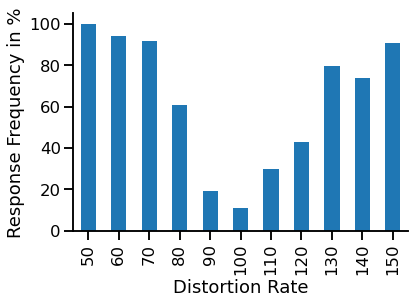

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfrel['relative'].plot.bar()
plt.xlabel('Distortion Rate')
plt.ylabel('Response Frequency in %')
sns.despine()

Danach stellen wir die relative Antworthäufigkeit für beide Verzerrkategorien dar, ohne einelne Verzerrgrade zu unterscheiden.

In [ ]:
#absolute Häufigkeiten
dfabstotal = df.copy(deep=True)
#create categories based on distortion rate
dfabstotal['distcategory'] = np.where(dfabstotal['distortion']<100, 'stauchung', 'streckung')
dfabstotal['distcategory'] = np.where(dfabstotal['distortion']==100, 'original', dfabstotal['distcategory'])
dfabstotal.drop(['image','category','distortion'],axis=1,inplace=True) #remove irrelevant columns
dfabstotal.groupby(['distcategory']).sum() #results for "response" column
dfabsbars = dfabstotal.groupby(['distcategory']).sum()
#create second df including total number of entries
dfreltotal = dfabsbars.copy(deep=True)
dfreltotal['total'] = dfabstotal.groupby(['distcategory']).count()
#divide total responses by total number of entries
dfreltotal['relative'] = (dfreltotal['response']/dfreltotal['total'])*100
dfreltotal

,response,total,relative
distcategory,,,
original,46,420,10.952381
stauchung,307,420,73.095238
streckung,266,420,63.333333


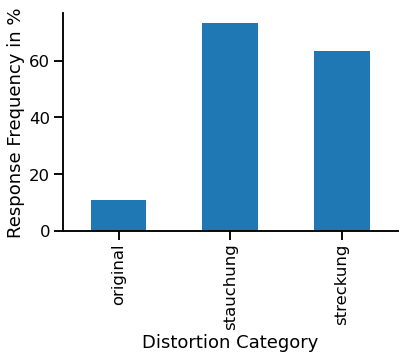

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfreltotal['relative'].plot.bar()
plt.xlabel('Distortion Category')
plt.ylabel('Response Frequency in %')
sns.despine()

# 2. Menschen vs. Tiere

In diesem Abschnitt visualisieren wir Daten zur Überprüfung unserer zweiten Hypothese

In [ ]:
dfp=df.copy(deep=True)
dfh=df.copy(deep=True)
dfp=dfp[dfp['category']=='p'] #df for pets
dfh=dfh[dfh['category']=='h'] #df for humans
dfp.drop(['image','category'],axis=1,inplace=True)
dfh.drop(['image','category'],axis=1,inplace=True)

In [ ]:
#calculate relative response frequency for both human and pet images

#pets
dfpgrp=dfp.groupby(['distortion']).sum()
dfpgrp['total']=dfp.groupby(['distortion']).count()
dfpgrp['relative']=(dfpgrp['response']/dfpgrp['total'])*100

#humans
dfhgrp=dfh.groupby(['distortion']).sum()
dfhgrp['total']=dfh.groupby(['distortion']).count()
dfhgrp['relative']=(dfhgrp['response']/dfhgrp['total'])*100

**Haustiere**

In [ ]:
dfpgrp

,response,total,relative
distortion,,,
50,42,42,100.000000
60,38,42,90.476190
70,39,42,92.857143
80,17,42,40.476190
90,6,42,14.285714
100,30,210,14.285714
110,8,42,19.047619
120,17,42,40.476190
130,32,42,76.190476


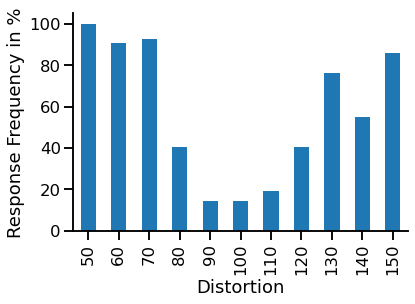

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfpgrp['relative'].plot.bar()
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

**Menschen**

In [ ]:
dfhgrp

,response,total,relative
distortion,,,
50,42,42,100.000000
60,41,42,97.619048
70,38,42,90.476190
80,34,42,80.952381
90,10,42,23.809524
100,16,210,7.619048
110,17,42,40.476190
120,19,42,45.238095
130,35,42,83.333333


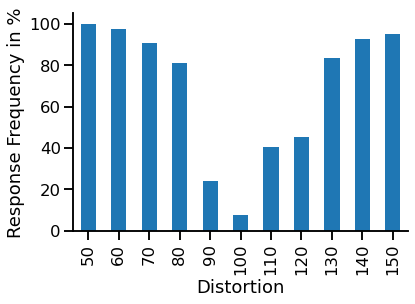

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfhgrp['relative'].plot.bar()
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

**Vergleich Mensch vs. Tier**

Nachdem wir die Antworten für Menschen und Tiere getrennt dargestellt haben, wollen wir die Antwortverteilungen der beiden Kategorien nebeneinander betrachten.

In [ ]:
#Add up all responses (human and pet pictures) for each distortion rate and category
dfpivot = df.copy (deep=True)
dfpivot = dfpivot.groupby(['distortion', 'category']).sum().reset_index() #reset_index is needed to undo the grouping after using sum()
dfpivot2 = df.copy(deep = True)
#Count number of responses (human and pet pictures) for each distortion rate and category
dfpivot2 = dfpivot2.groupby(['distortion', 'category']).count().reset_index()
dfpivot3 = pd.merge(dfpivot, dfpivot2, on=['distortion', 'category'])
dfpivot3.drop(['image'],axis=1,inplace=True)
dfpivot3 = dfpivot3.rename(columns={'response_x': 'response', 'response_y': 'total'})
dfpivot3['relative']=(dfpivot3['response']/dfpivot3['total'])*100
dfpivot3

,distortion,category,response,total,relative
0,50,h,42,42,100.000000
1,50,p,42,42,100.000000
2,60,h,41,42,97.619048
3,60,p,38,42,90.476190
4,70,h,38,42,90.476190
5,70,p,39,42,92.857143
6,80,h,34,42,80.952381
7,80,p,17,42,40.476190
8,90,h,10,42,23.809524
9,90,p,6,42,14.285714


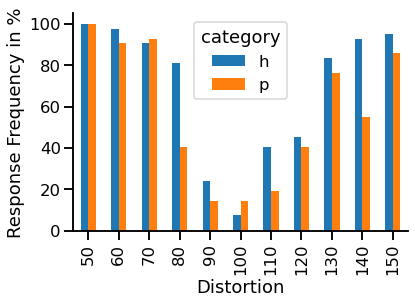

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfpivot3.pivot("distortion", "category", "relative").plot(kind='bar')
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

Beim Auswerten der Daten fiel auf, dass für Haustiere mit Streckungsgrad von 140% viel seltener eine Verzerrung vermutet wurde, als bei weniger stark gestreckten Haustieren. Um das genauer zu untersuchen schauten wir uns die relativen Häufigkeiten bei den einzelnen Bilder des Verzerrungsgrades 140% genauer an.

In [ ]:
df140=df[df['distortion']==140] #retrieve all data for a distortion rate of 140%
df140 = df140.groupby(['image']).sum() #get the number of responses for each image
df140t = df[df['distortion']==140]
df140t = df140t.groupby(['image']).count() #get total number of entries for each image
df140r = pd.merge(df140, df140t, on=['image'])
df140r.drop(['distortion_x', 'distortion_y','category'],axis=1,inplace=True)
df140r = df140r.rename(columns={'response_x': 'response', 'response_y': 'total'})
df140r['relative']=(df140r['response']/df140r['total'])*100 #calculate relative responses for each image
df140r

,response,total,relative
image,,,
human7,20,21,95.238095
human8,19,21,90.476190
pet7,18,21,85.714286
pet8,5,21,23.809524


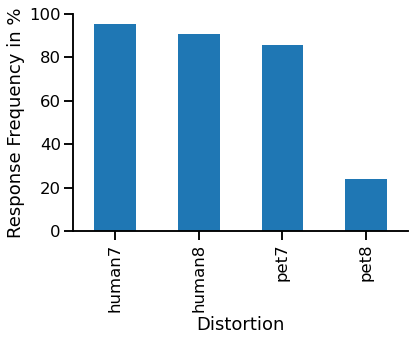

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
df140r['relative'].plot.bar()
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

Das genauere Hinsehen zeigte, dass ein spezifisches Haustier, "pet8" der Grund für den Ausreißer war. Wir entschieden uns deshalb, die Daten für pet8 bei der Auswertung zu ignorieren.

In [ ]:
dfpivotn8 = df[df['image']!='pet8'] #get new dataframe excluding outlier pet8
dfpivotn8 = dfpivotn8.groupby(['distortion', 'category']).sum().reset_index()
dfpivot2n8 = df[df['image']!='pet8']
dfpivot2n8 = dfpivot2n8.groupby(['distortion', 'category']).count().reset_index()
dfpivot3n8 = pd.merge(dfpivotn8, dfpivot2n8, on=['distortion', 'category'])
dfpivot3n8.drop(['image'],axis=1,inplace=True)
dfpivot3n8 = dfpivot3n8.rename(columns={'response_x': 'response', 'response_y': 'total'})
dfpivot3n8['relative']=(dfpivot3n8['response']/dfpivot3n8['total'])*100
dfpivot3n8

,distortion,category,response,total,relative
0,50,h,42,42,100.000000
1,50,p,42,42,100.000000
2,60,h,41,42,97.619048
3,60,p,38,42,90.476190
4,70,h,38,42,90.476190
5,70,p,39,42,92.857143
6,80,h,34,42,80.952381
7,80,p,9,21,42.857143
8,90,h,10,42,23.809524
9,90,p,6,42,14.285714


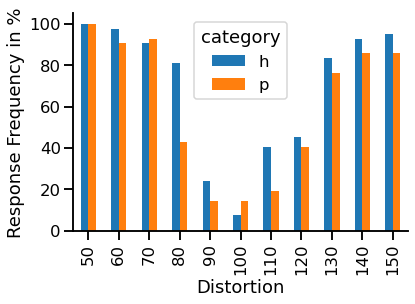

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfpivot3n8.pivot("distortion", "category", "relative").plot(kind='bar')
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

In [ ]:
dfcopy3=df.copy(deep=True)
dfcopy3=dfcopy3[dfcopy3['distortion']!=100] #exclude original pictures
dfcopy3=dfcopy3[dfcopy3['image']!='pet8']
dfcopy3=dfcopy3.groupby(['category']).sum() #add number of responses for each category
dfcopy4=df.copy(deep=True)
dfcopy4=dfcopy4[dfcopy4['distortion']!=100]
dfcopy4=dfcopy4[dfcopy4['image']!='pet8']
dfcopy4.drop(['image', 'distortion'],axis=1,inplace=True)
dfcopy3['total']=dfcopy4.groupby(['category']).count() #count total number of entries for each category
dfcopy3['relative']=(dfcopy3['response']/dfcopy3['total'])*100
dfcopy3 #dataframe includes response data for distorted pictures only

,distortion,response,total,relative
category,,,,
h,42000,315,420,75.000000
p,37380,245,378,64.814815


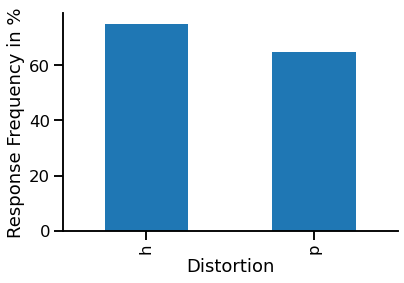

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dfcopy3['relative'].plot.bar()
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

In [ ]:
dftotalcat = df.copy(deep=True)
dftotalcat=dftotalcat[dftotalcat['image']!='pet8']
#assign labels depending on the distortion rate
dftotalcat['distcategory'] = np.where(dftotalcat['distortion']<100, 'stauchung', 'streckung')
dftotalcat['distcategory'] = np.where(dftotalcat['distortion']==100, 'original', dftotalcat['distcategory'])
dftotalcat.drop(['image', 'distortion'],axis=1,inplace=True)
dftotalcat2 = dftotalcat.groupby(['distcategory', 'category']).sum().reset_index()
dftotalcatrel = dftotalcat.groupby(['distcategory', 'category']).count().reset_index()
dftotalcat2 = pd.merge(dftotalcat2, dftotalcatrel, on=['distcategory', 'category'])
dftotalcat2 = dftotalcat2.rename(columns={'response_x': 'response', 'response_y': 'total'})
dftotalcat2['relative']=(dftotalcat2['response']/dftotalcat2['total'])*100
dftotalcat2

,distcategory,category,response,total,relative
0,original,h,16,210,7.619048
1,original,p,27,189,14.285714
2,stauchung,h,165,210,78.571429
3,stauchung,p,134,189,70.899471
4,streckung,h,150,210,71.428571
5,streckung,p,111,189,58.730159


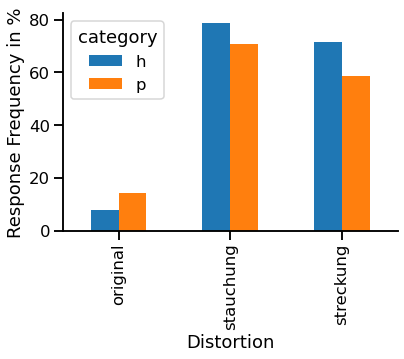

In [ ]:
#use pyplot for plotting the data and seaborn to remove spines
dftotalcat2.pivot("distcategory", "category", "relative").plot(kind='bar')
plt.xlabel('Distortion')
plt.ylabel('Response Frequency in %')
sns.despine()

# Ergebnisse

Nach Betrachtung der Daten können wir feststellen, dass diese unsere beiden Hypothesen bestätigen.

# Manöverkritik

Uns sind 3 Ansätze eingefallen, wie man bei einer erneuten Untersuchung der Fragestellung aussagekräftigere Ergebnisse erhalten könnte.

Einmal könnte man statt der prominenten Gesichter den Versuchssubjekten unbekannte Personen abfotografieren - die Haustiere waren den meisten weniger vertraut als Olaf Scholz oder Barack Obama.

Außerdem könnte jedes Versuchsobjekt mit jedem der von uns ausgewählten Verzerrungsgrade verzerrt werden, um den Vergleich zwischen den einzelnen Verzerrungsstufen aussagekräftiger zu machen und Effekte die sich nur bei einer bestimmten Verzerrung eines Bildes gezeigt haben zu verhindern.

Schlussendlich könnte man bei jeder Durchführung des Versuchs die Bilder zufällig anordnen um eventuelle Zusammenhänge zwischen ähnlichen Bildern zu umgehen.

Insgesamt wäre der Versuch aussagekräftiger, wären mehr Daten gesammelt worden.